## Compressible boundary layer similar solutions
---
### Problem: 2D compressible boundary layer equations
> Conservation of mass, $x$ momentum , $y$ momentum and energy:
> $\begin{pmatrix} 
\frac{\partial \rho u}{\partial x} + \frac{\partial \rho v}{ \partial y} \\
\rho u \frac{\partial u}{\partial x} + \rho v \frac{\partial u}{\partial y} - \frac{d p_e}{dx} - \frac{\partial }{\partial y}\big ( \mu \frac{\partial u}{\partial y} \big) \\
\frac{\partial p}{\partial y} \\
\rho u \frac{\partial h}{\partial x} + \rho v \frac{\partial h}{\partial y} - \frac{\partial }{\partial y} \big (k \frac{\partial T}{\partial y} \big) -  u \frac{d p_e}{dx} - \mu \big( \frac{\partial u}{\partial y}\big)^2
\end{pmatrix} = \boldsymbol{0}$
> The problem is commonly found in textbooks [1-3]. Although current system is non-reactive, [1-2] also consider reacting flow.
>
> Applying similarity transformation without any further assumptions leads to (See [1] Section 6.5):
> $\begin{pmatrix}
\big(Cf^{''} \big)^{'} + ff^{''} -  
\frac{2\xi}{u_e} \bigg( (f^{'})^2 - \frac{\rho_e}{\rho}   \bigg) \frac{du_e}{d\xi} - 2\xi\bigg( f^{'} \frac{\partial f^{'}}{\partial \xi} - f^{''} \frac{\partial f}{\partial \xi}\bigg)\\
\frac{\partial p}{\partial \eta} \\
\bigg( \frac{C}{Pr}g^{'} \bigg)^{'} + fg^{'} - 2\xi \bigg( f^{'}\frac{\partial g}{\partial \xi} + \frac{f^{'}g}{h_e} \frac{\partial f}{\partial \xi} - g^{'} \frac{\partial f}{\partial \xi} + \frac{\rho_e u_e}{\rho h_e} f^{'} \frac{du_e}{d \xi} \bigg) + C\frac{u_{e}^2}{h_e} (f^{''})^{2}
\end{pmatrix} = \boldsymbol{0} $
>
> Where:
> - Subscript ($_e$) represents boundary layer edge state.
>
> - $\xi \equiv \int_{0}^{x} \rho_{e} u_{e} \mu_{e} dx_{1}$ and $\eta \equiv \frac{u_e}{\sqrt{2\xi}}\int_{0}^{y} \rho dy_1$
> ($x_1$ and $y_1$ are dummy integration variables).
> - $f^{'}$ is the nondimensional velocity field in transformed coordinates,
> 
> &emsp;&emsp; $f^{'} \equiv \frac{\partial f(\xi,\eta)}{\partial \eta} = \frac{u(\xi ,\eta)}{u_e(\xi)}.$
> - $g$ is just the nondimensional static enthalpy,
> 
> &emsp;&emsp; $g \equiv \frac{h(\xi,\eta)}{h_{e}(\xi)}.$ 
> 
> -  C is Chapman-Rubesin factor, it accounts for transport property variation, 
>
> &emsp;&emsp; $C \equiv \frac{\rho \mu }{\rho_e \mu_e}.$
>
---
#### Specific case: Flat plate
> Considering a specific case and applying boundary conditions can further simplify the problem, converting the two PDEs to ODEs. There are few other cases which also other similar simplifications, [1-3] consider a range of boundary conditions, stagnation point flow and axis-symmeteric and inclined boundary layers. However, here only a flat plate is considered.
> 
> 
> - Assumption: Boundary layer is fully developed, so $u_{e}, \rho_e, h_e $ are constants  $\rightarrow \frac{\partial ()}{\partial \xi} = 0$.
> 
> &emsp;&emsp;  $\rightarrow f^{'} \equiv \frac{d f(\eta)}{d \eta} = \frac{u(\eta)}{u_e}$
> 
> &emsp;&emsp;  $\rightarrow g \equiv \frac{h(\eta)}{h_{e}}.$ 
>
> - Boundary conditions :
>   - No slip - $f^{'}(0) = 0 ; f(0) = 0$
>   - If adiabatic wall $\frac{\partial T}{\partial y} = 0  \rightarrow g^{'}(0) = 0$. If constant wall temperature, $g(0) = g_w$.
>   - $g(\eta \rightarrow \infty) = 1$  $f^{'}(\eta \rightarrow \infty ) = 1$.
>
> $\begin{pmatrix}  \big(Cf^{''} \big)^{'} + ff^{''} \\ \bigg( \frac{C}{Pr}g^{'} \bigg)^{'} + fg^{'}  + C\frac{u_{e}^2}{h_e} (f^{''})^{2} \end{pmatrix} = \boldsymbol{0} $
> 
>

### Solution
Alternative solution procedures can be found in [3-6]

---
> References:
>
> [1] Anderson, John David. Hypersonic and high temperature gas dynamics. AIAA, 2000.
>
> [2] Hayes, Wallace. Hypersonic flow theory. Elsevier, 2012.
>
> [3] White, Frank M. "Viscous Flow Theory." (1974).
>
> [4] Oz, Furkan, and Kursat Kara. "A CFD Tutorial in Julia: Introduction to Compressible Laminar Boundary-Layer Flows." Fluids 6.11 (2021): 400.
>
> [5] Cohen, Clarence B., and Eli Reshotko. Similar solutions for the compressible laminar boundary layer with heat transfer and pressure gradient. Flight Propulsion Research Lab Cleveland Oh, 1955.
> 
> [6] Van Driest, E. R. "Investigation of laminar boundary layer in compressive fluids using the Crocco method." NACA Technical Note 2597 (1952).
>
---
#### Reducing order of the ODE


#### Discretisation and guessing unkown BCs

TODO: Write equations

In [392]:
## Load libs
import numpy as np
import plotly as plty
import matplotlib.pyplot as plt 

In [393]:
# Data from https://ntrs.nasa.gov/api/citations/20020085330/downloads/20020085330.pdf

# Class to store and calculate N2 thermodynamic and transport properties
class N2:
    # NASA-7 polynomails for different temperature ranges
    # For mixtures thermochemistry library like Mutation++ or Cantera can be used.
    range1 = np.array([ 2.210371497E+04, -3.818461820E+02, 6.082738360E+00, -8.530914410E-03, 1.384646189E-05,-9.625793620E-09, 2.519705809E-12,  7.108460860E+02, -1.076003744E+01])

    range2 = np.array([5.877124060E+05, -2.239249073E+03, 6.066949220E+00, -6.139685500E-04, 1.491806679E-07, -1.923105485E-11, 1.061954386E-15,  1.283210415E+04, -1.586640027E+01])

    R = 8.314/28.0134E-3 # specific gas constant J/kgK
    gamma = 1.4          # specific heats ratio
    Pr = 0.7             # Prandtl number
    
    # Function to calculate specific heat capcity for constant pressure process (cp) for a given temperature (T)
    def cp(self,T):
        if (T>200 and T<=1000):
            coef = self.range1
            cp = self.R*(coef[0]*T**-2  + coef[1]*T**-1 + coef[2] + coef[3]*T + coef[4]*T**2 + coef[5]*T**3 + coef[6]*T**4)  # J/kg
        elif (T>1000 and T<6000):
            coef = self.range2
            cp = self.R*(coef[0]*T**-2  + coef[1]*T**-1 + coef[2] + coef[3]*T + coef[4]*T**2 + coef[5]*T**3 + coef[6]*T**4)  # J/kg
        else: 
            print("T outside temperature range",T)
            quit(keep_kernel=True)
    

        return cp

    # Function to calculate enthalpy (h) at given temperature (T)
    def enthalpy(self,T):
        if (T>200 and T<=1000):
            coef = self.range1
        elif (T>1000 and T<6000):
            coef = self.range2
        else: 
            print("T outside temperature range",T)
            quit(keep_kernel=True)
    
        h = T*self.R*(-coef[0]*T**(-2)  + coef[1]*np.log(T)/T + coef[2] + coef[3]*T/2 + (1/3)*coef[4]*T**2 + (1/4)*coef[5]*T**3 + (1/5)*coef[6]*T**4 +  coef[7]/T)  # h - h_298.5K  J/kg

        return h
    
    # Function to calculate viscosity at a given temperature (T) using sutherlands law
    def visc(self,T):
        
        mu0 = 1.789E-5#1.663E-5
        T0 = 288
        S  = 110

        mu = mu0*((T/T0)**1.5) * (T0 + S)/(T + S)
        return mu

    #Newton-Rhapson for finding temperature (T) for a given enthalpy (h)
    def h2T (self,h0):
        imax = 50
        error_max = 0.001
        delta = 0.001 #K

        Tguess = 300
        error = 10
        i=1
        while (i < imax and error > error_max) :
            func  = self.enthalpy(Tguess) - h0
            dfunc = (self.enthalpy(Tguess + delta) - self.enthalpy(Tguess) )/delta
            Tnew  = Tguess - func/dfunc

            error  = abs(Tnew -Tguess)/Tnew
            Tguess = Tnew
            i = i+1
        return Tnew

In [394]:
## Test 
gas = N2()
print("Cp at T=300K",gas.cp(300))
print("Enthalpy at T=300K",gas.enthalpy(300))
print("h2T test : ",gas.h2T(gas.enthalpy(3200)))

Cp at T=300K 1039.6239577884935
Enthalpy at T=300K 1923.2766924505243
h2T test :  3200.000029214123


In [413]:
class problem:

    def __init__(self,gas,Me,Te,Pe,ibcs,npts,dn):
        self.Me   = Me
        self.Te   = Te
        self.Pe   = Pe
        self.gas  = gas

        self.he   = gas.enthalpy(Te)
        self.rhoe = Pe/(self.gas.R*Te)
        self.ue   = Me*np.sqrt(gas.gamma*gas.R*Te)
        self.mue  = gas.visc(Te)

        self.bcs  = ibcs
        self.npts = npts
        self.dn   = dn
        self.nmax = dn*npts
    

    def calculate_BL(self):
        
        y1 = np.zeros(self.npts + 1)  # f
        y2 = np.zeros(self.npts + 1)  # f'
        y3 = np.zeros(self.npts + 1)  # f''
        y4 = np.zeros(self.npts + 1)  # g
        y5 = np.zeros(self.npts + 1)  # g'
        C  = np.zeros(self.npts + 1)  # rho mu / rho mu
        
        # apply boundary conditions
        y1[0] = 0
        y2[0] = 0
        y3[0] = self.bcs[0] # du/dn
        y4[0] = self.bcs[1] # hw
        y5[0] = 0
        h     = self.bcs[1]*self.he
        T     = self.gas.h2T(h)
        rho   = self.Pe/(self.gas.R*T)
        C[0]  = rho*self.gas.visc(T)/(self.rhoe*self.mue)

        dn = self.dn
        for i in range(1,self.npts+1):

            ## calculate RHS
            rhs1 = y2[i-1]
            rhs2 = y3[i-1]
            rhs3 =-y1[i-1]*y3[i-1]
            rhs4 = y5[i-1]
            rhs5 =-y1[i-1]*y5[i-1] - C[i-1]*((self.ue**2)/(self.he))*y3[i-1]**2
            
            ## Space march 
            y1[i] = y1[i-1]            + rhs1*dn
            y2[i] = y2[i-1]            + rhs2*dn
            Cy3   = C[i-1]*y3[i-1]     + rhs3*dn   # C*y3[i]
            y4[i] = y4[i-1]            + rhs4*dn
            C_Pry5= (C[i-1]/self.gas.Pr)*y5[i-1]+ rhs5*dn # C/Pr y5[i]
        
            ## calculate C and find y3 and y5   
            h     = y4[i]*self.he
            T     = self.gas.h2T(h)
            rho   = self.Pe/(self.gas.R*T)
            C[i]  = rho*self.gas.visc(T)/(self.rhoe*self.mue)
            # print(T,C[i])
            y3[i] = Cy3/C[i]
            y5[i] = C_Pry5*(self.gas.Pr/C[i])

        # return y2 = f'= u/ue  and  y4 = g = h/he  
        return y2,y4

In [437]:
# Define problem
gas   = N2()

# Newton-Rhapson parameters
imax = 50
error = 10
error_max = 0.01
delta = 0.001


# Function for Newton-Rhapson, checks the solution accuracy at large eta ( where f',g both tend to 1)
def BLSol(prob,bcs):
    prob.bcs = bcs
    df,g = prob.calculate_BL()
    f = [df[-1] - 1,g[-1] - 1]
    return f


hw_he = gas.enthalpy(2000)/gas.enthalpy(300)#initial guess for g based on T
guess_bcs  = np.array([0.65,hw_he])         # initial boundary conditions guess 
prob  = problem(gas,6,300,1.01E+5,ibcs,4000,0.005) # initialise problem
print("Boundary layer edge state:")
print("Me = ", prob.Me)
print("Te = ", prob.Te)
print("Pe = ", prob.Pe)
print("rhoe = ", prob.rhoe)
print("ue = ", prob.ue)
print("he = ", prob.he)
print("mue = ", prob.mue)

i=1
jacob = np.zeros((2,2))
while (i < imax and error > error_max) :

    # func = [f0(x0,x1) , f1(x0,x1) ]^T
    func  = BLSol(prob,guess_bcs)  
    #dfunc0 = [f0(x0 + delta,x1) , f1(x0 + delta,x1) ]^T
    dfunc0 = BLSol(prob,guess_bcs + delta*np.array([1,0])) ## 2 tp speedup convergence of velocity BL
    #dfunc1 = [f0(x0,x1 + delta) , f1(x0 ,x1+ delta) ]^T
    dfunc1 = BLSol(prob,guess_bcs + delta*np.array([0,1]))

    jacob[0][0] =( dfunc0[0] - func[0]  )/delta #df0/dx0
    jacob[0][1] =( dfunc0[1] - func[1]  )/delta #df0/dx1
    jacob[1][0] =( dfunc1[0] - func[0]  )/delta #df1/dx0
    jacob[1][1] =( dfunc1[1] - func[1]  )/delta #df1/dx1

    inv_jacob = np.linalg.inv(jacob)
    new_bcs = guess_bcs - np.matmul(func,inv_jacob)
    error  = np.linalg.norm(guess_bcs - new_bcs)/np.linalg.norm(new_bcs)

    print("-------ITERATION = ",i)
    print("func   :",func)
    print("dfunc0 :",dfunc0)
    print("dfunc1 :",dfunc1,"\n")
    print("J      :",jacob)
    print("J^-1   :",inv_jacob,"\n")
    print("Old BCs:",guess_bcs)
    print("New BCs:",new_bcs)
    print("error  :",error)

    i = i+1
    guess_bcs = new_bcs



-------ITERATION =  1
func   : [-0.044359566010189866, 161.0884995726512]
dfunc0 : [-0.04346322687593129, 159.46684278418007]
dfunc1 : [-0.04435963187969394, 161.08960714142603] 

J      : [[ 8.96339134e-01 -1.62165679e+03]
 [-6.58695041e-05  1.10756877e+00]]
J^-1   : [[1.25016298e+00 1.83043738e+03]
 [7.43498890e-05 1.01173853e+00]] 

Old BCs: [6.50000000e-01 1.04185681e+03]
New BCs: [6.93479775e-01 9.60074774e+02]
error  : 0.08518297359826782
-------ITERATION =  2
func   : [-0.0011682097530041347, 1.1447161148367941]
dfunc0 : [-0.00031638647096055017, -0.44648915653869004]
dfunc1 : [-0.0011682683529758986, 1.1458055412065535] 

J      : [[ 8.51823282e-01 -1.59120527e+03]
 [-5.85999718e-05  1.08942637e+00]]
J^-1   : [[1.30508648e+00 1.90619627e+03]
 [7.02002751e-05 1.02044808e+00]] 

Old BCs: [6.93479775e-01 9.60074774e+02]
New BCs: [6.94924030e-01 9.61133488e+02]
error  : 0.0011015269327980827


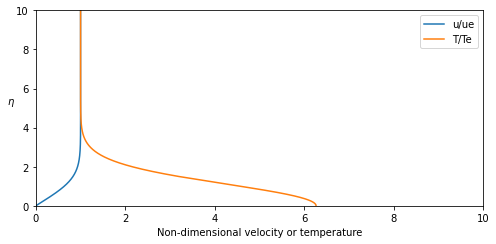

In [443]:
prob.bcs = new_bcs
df,g = prob.calculate_BL()
eta = np.linspace(0,prob.npts,prob.npts+1)*prob.dn
# find temperature profile from enthalpy profiles
temp = np.zeros(prob.npts+1)
for i in range(0,prob.npts+1) :
    h = g[i]*prob.he
    temp[i] = gas.h2T(h)/prob.Te



#plot
sx   = 1
sy   = 0.5
size = np.array([7,sy*7]) #A4 page size(8.3 x 11.7 inch) , ~0.8inch margin 

fig,axes = plt.subplots(1,1)
fig.set_size_inches(size)

axes.plot(df,eta,label='u/ue')
axes.plot(temp,eta,label='T/Te')
axes.set_xlim([0,10])
axes.set_ylim([0,10])
axes.set_ylabel('$\eta$', rotation=0, labelpad=5)
axes.set_xlabel('Non-dimensional velocity or temperature')
axes.legend()

plt.tight_layout()

#### Spare code

In [ ]:


## Define problem
gas   = N2()
# hw_he = gas.enthalpy(2000)/gas.enthalpy(300)  ##initial guess for g
# ibcs  = np.array([0.65,hw_he]) # boundary conditions 

ibcs = np.array([6.83362364e-02, 2.45924469e+03])
prob  = problem(gas,6,300,1.01E+5,ibcs,2000,0.01)

df,g = prob.calculate_BL()
print("Boundary layer edge state:")
print("Me = ", prob.Me)
print("Te = ", prob.Te)
print("Pe = ", prob.Pe)
print("rhoe = ", prob.rhoe)
print("ue = ", prob.ue)
print("he = ", prob.he)
print("mue = ", prob.mue)

#plot
sx   = 1
sy   = 0.5
size = np.array([7,sy*7]) #A4 page size(8.3 x 11.7 inch) , ~0.8inch margin 

fig,axes = plt.subplots(1,2)
fig.set_size_inches(size)
eta = np.linspace(0,prob.npts,prob.npts+1)*prob.dn

# find temperature profile from enthalpy profiles
temp = np.zeros(prob.npts+1)
for i in range(0,prob.npts+1) :
    h = g[i]*prob.he
    temp[i] = gas.h2T(h)/prob.Te


axes[0].plot(df,eta,label='u/ue')
axes[0].set_xlim([0.0,1.2])
axes[0].set_ylim([0,10])
axes[0].set_ylabel('eta', rotation=0, labelpad=15)
axes[0].legend()


axes[1].plot(temp,eta,label='T/Te')
# axes[1].plot(C,eta,label='C')
axes[1].set_ylabel('eta', rotation=0, labelpad=15)
axes[1].set_xlim([0.0,10])
axes[1].set_ylim([0,10])
axes[1].legend()

plt.tight_layout()